# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df=pd.merge(study_results, mouse_metadata, on="Mouse ID", how='left')

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_metadata)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
All_duplicate_data = merge_df.loc[merge_df["Mouse ID"] == duplicate[0]]
All_duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_data=clean_data['Mouse ID'].unique()
len(number_mice_data)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

set_index = clean_data.set_index(["Drug Regimen"])
group_data=set_index.groupby("Drug Regimen")
total_mean=group_data["Tumor Volume (mm3)"].mean()
total_median=group_data["Tumor Volume (mm3)"].median()
total_var=group_data["Tumor Volume (mm3)"].var()
total_std=group_data["Tumor Volume (mm3)"].std()
total_sem=group_data["Tumor Volume (mm3)"].sem()
result_data= pd.DataFrame({"Mean Tumor Volume":  total_mean,
                                 "Median Tumor Volume": total_median ,
                                 "Tumor Volume Variance": total_var ,
                                 "Tumor Volume Std. Dev.": total_std ,
                                 "Tumor Volume Std. Err.":total_sem })

result_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_method=set_index.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
aggregation_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

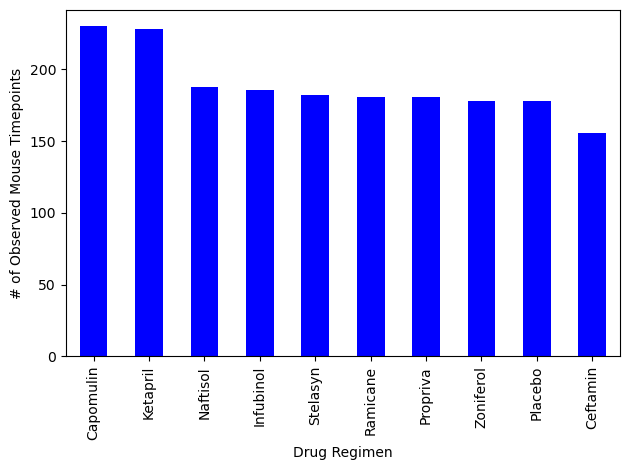

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
collect_data = clean_data[["Drug Regimen","Timepoint"]]
count_rows = collect_data["Drug Regimen"].value_counts()

Figure1=count_rows.plot(kind="bar", facecolor="b", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
xticklabels=collect_data["Drug Regimen"].unique()
Figure1.set_xticklabels(xticklabels, rotation=90)
plt.tight_layout()
plt.show()

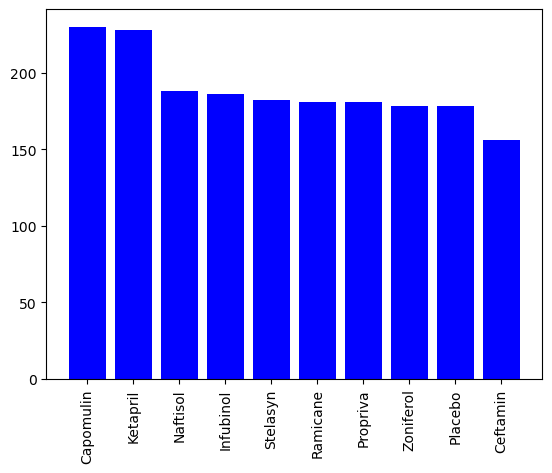

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_set=clean_data["Drug Regimen"].unique()
y_set=clean_data["Drug Regimen"].value_counts()
plt.bar(x_set, y_set, color="b", alpha=1, align="center")
tick_locations=[value for value in x_set]
plt.xticks(tick_locations, x_set, rotation=90)
plt.show()

In [11]:
collect_data_pie = clean_data[["Mouse ID","Sex"]]
count_rows_pie = collect_data_pie["Sex"].value_counts()
count_rows_pie

Sex
Male      958
Female    930
Name: count, dtype: int64

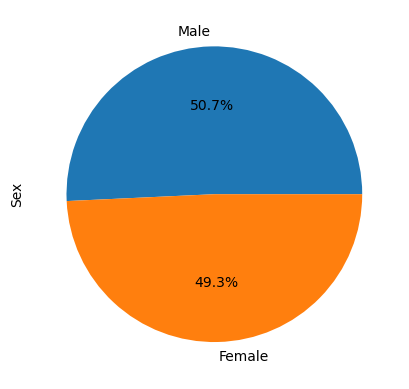

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
collect_data_pie = clean_data[["Mouse ID","Sex"]]
count_rows_pie = collect_data_pie["Sex"].value_counts()
Figure1=count_rows_pie.plot(kind="pie", autopct='%1.1f%%', ylabel="Sex")
plt.show()

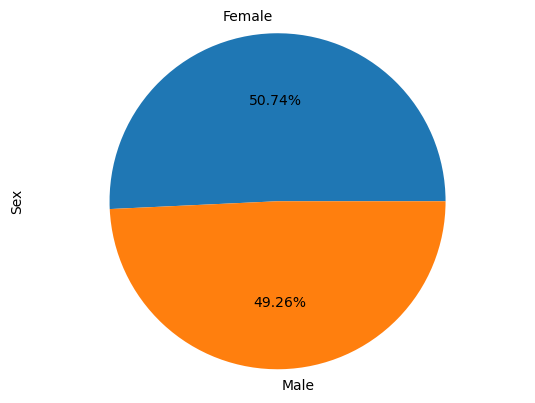

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_set_pie=clean_data["Sex"].unique()
y_set_pie=clean_data["Sex"].value_counts()
plt.pie(y_set_pie, autopct='%2.2f%%', labels=x_set_pie)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") |
                                         (clean_data["Drug Regimen"] == "Ramicane") |
                                        (clean_data["Drug Regimen"] == "Infubinol") |
                                         (clean_data["Drug Regimen"] == "Ceftamin")]
four_regimens                                     
# Start by getting the last (greatest) timepoint for each mouse
group_drug =four_regimens.groupby(["Drug Regimen","Mouse ID"]).last()
mouse_idi_list =group_drug.reset_index()

greatest_timepoint=mouse_idi_list[["Drug Regimen", "Tumor Volume (mm3)"]]
greatest_timepoint

regimens_1 =greatest_timepoint.loc[greatest_timepoint["Drug Regimen"] == "Capomulin"]
regimens_1

regimens_2=greatest_timepoint.loc[greatest_timepoint["Drug Regimen"] == "Ramicane"]
regimens_2

regimens_3 = greatest_timepoint.loc[greatest_timepoint["Drug Regimen"] == "Infubinol"]
regimens_3

regimens_4= greatest_timepoint.loc[greatest_timepoint["Drug Regimen"] == "Ceftamin"]
regimens_4

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.DataFrame({"Capomulin": regimens_1["Tumor Volume (mm3)"],
         "Ramicane": regimens_2["Tumor Volume (mm3)"],
          "Infubinol": regimens_3["Tumor Volume (mm3)"],
          "Ceftamin": regimens_4["Tumor Volume (mm3)"]})

new_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [145]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in greatest_timepoint["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
treatment


# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []
upperq_list = []
lowerq_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:    
    quartiles = new_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    
    print(f"{drug}'s potential outliers:{iqr}")
   
    
upperq_list   
lowerq_list

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Capomulin's potential outliers:7.781863460000004
Ceftamin's potential outliers:15.577752179999997
Infubinol's potential outliers:11.477135160000003
Ramicane's potential outliers:9.098536719999998


Text(0.5, 0, '')

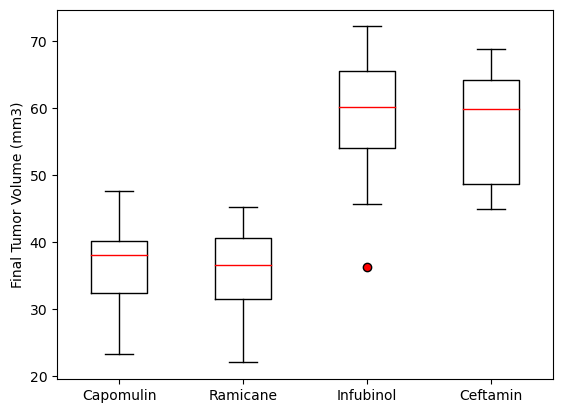

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='r'),
                         flierprops=dict(markerfacecolor='red', marker='o'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

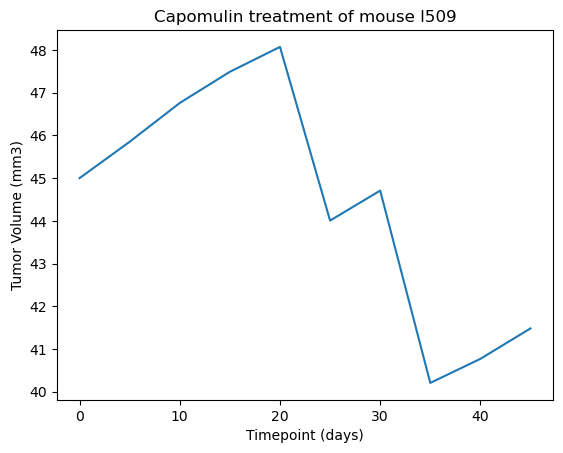

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
special_capomulin = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") 
                                    & (clean_data["Mouse ID"] == "l509")]
specific_capomulin = special_capomulin[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin = specific_capomulin.set_index(["Timepoint"])
timepoint = reduced_capomulin.index.values
tumor_vol = reduced_capomulin.values

plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


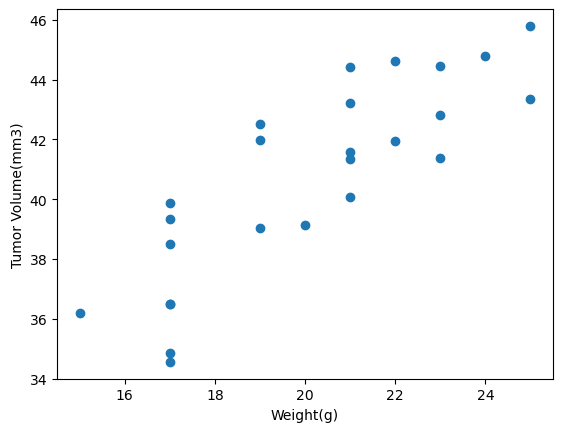

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")


avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})

plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume(mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


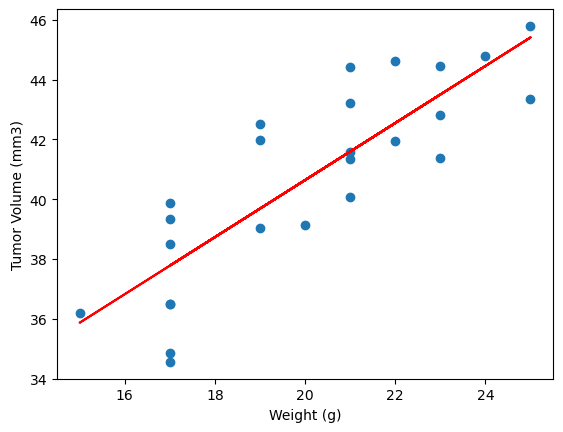

In [83]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()